In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = open('../inputs/input-day13').read().splitlines()

In [3]:
nums = [list(map(int, l.split(','))) for l in data[:-13]]

In [4]:
folds = [l[11:].split('=') for l in data[-12:]]

Initial conditions are important for the folding, taking a square is not good:

In [5]:
print(max(l[0] for l in nums))
print(max(l[1] for l in nums))

1310
894


In [6]:
grid = np.zeros((1311,895))

In [7]:
for (i,j) in nums:
    grid[i,j] = 1

In [8]:
def do_fold(grid, direction, line):
    line = int(line)
    if direction == 'x':
        tmp = grid[line:,:][::-1,:]
        grid = grid[:line,:] + tmp[:line,:]
    else:
        tmp = grid[:,line:][:,::-1]
        grid = grid[:,:line] + tmp[:,:line]
        
    grid[grid > 0] = 1
    return grid

First fold:

In [9]:
grid = do_fold(grid, *folds[0])

In [10]:
print((grid > 0).sum())

647


-------
Rest of the folds:

In [11]:
for f in folds[1:]:
    grid = do_fold(grid, *f)

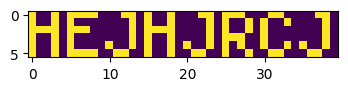

In [12]:
fig = plt.figure(figsize =(4, 4)) 
fig.set_dpi(100.0)
_ = plt.imshow(grid.T)